In [1]:
%matplotlib inline
import numpy as np
import pylab as pl

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 10, 10
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 15
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'large'
pl.rcParams['axes.labelsize']  = 'large'
   
pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'
   
pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

pl.rcParams['image.cmap'] = 'YlOrRd'

In [2]:
#import data files
EMISS = True
mask_tolerance = 100.

folder = 'kappa_jnu_new_fit/'
dist_emiss = '2_jnu'
nu_used        = np.loadtxt(folder + dist_emiss + 'nu.txt')
obs_angle_used = np.loadtxt(folder + dist_emiss + 'theta.txt')

exact_avg_only_I           = np.loadtxt(folder + dist_emiss + 'exactI.txt')
avgs_only_I                = np.loadtxt(folder + dist_emiss + 'avgsI.txt')
relative_difference_I = np.loadtxt(folder + dist_emiss + 'reldiffI.txt')

exact_avg_only_lin           = np.loadtxt(folder + dist_emiss + 'exactlin.txt')
avgs_only_lin                = np.loadtxt(folder + dist_emiss + 'avgslin.txt')
relative_difference_lin = np.loadtxt(folder + dist_emiss + 'reldifflin.txt')

exact_avg_only_circ           = np.loadtxt(folder + dist_emiss + 'exactV.txt')
avgs_only_circ                = np.loadtxt(folder + dist_emiss + 'avgsV.txt')
relative_difference_circ = np.loadtxt(folder + dist_emiss + 'reldiffV.txt')

0.351847616557


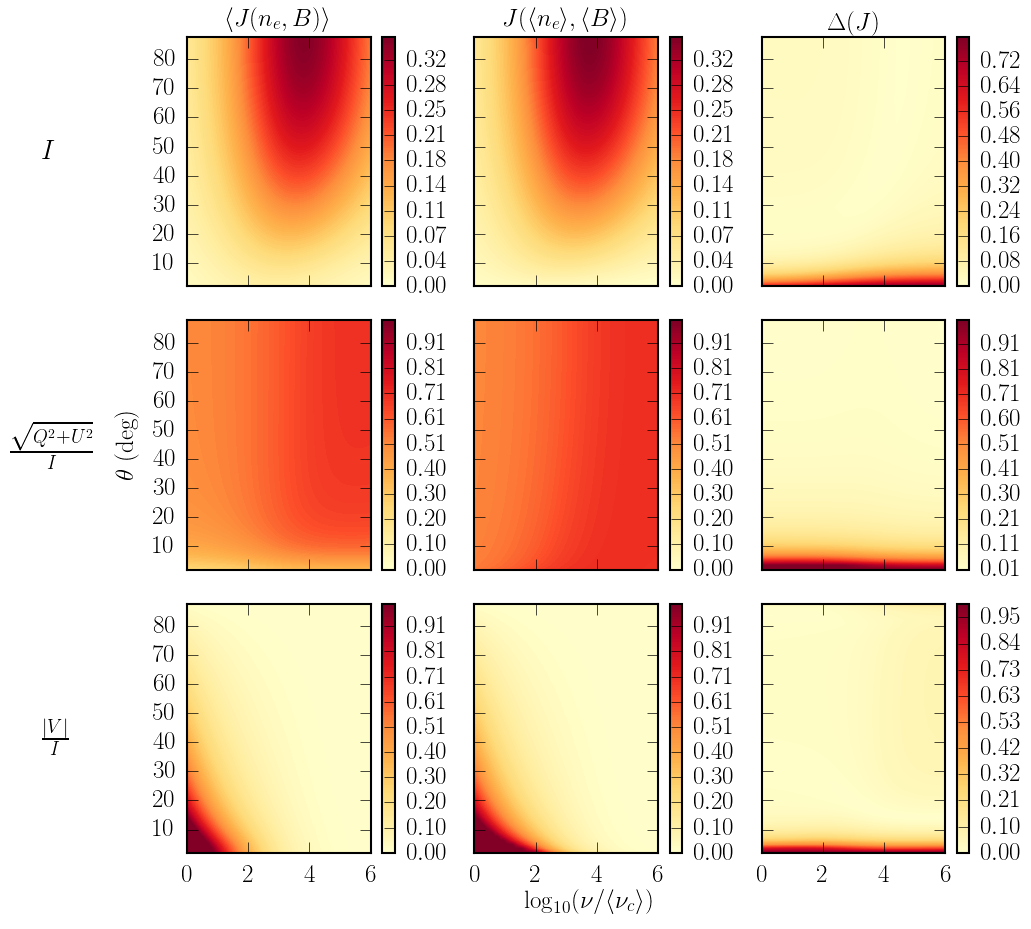

In [3]:
X, Y = np.meshgrid(nu_used, obs_angle_used)

figure, ax = pl.subplots(nrows=3, ncols=3)

max_value_I_colorbar = max(np.amax(exact_avg_only_I), np.amax(avgs_only_I))
w = np.linspace(0., max_value_I_colorbar, 100)

print max_value_I_colorbar
tick_array = [0.0, 1.4e-4, 2.8e-4, 4.2e-4, 5.6e-4, 7.0e-4, 8.4e-4, 9.8e-4, 11.2e-4, 12.6e-4]


small_colorbar_labels = False
if(max_value_I_colorbar < 0.02):
    small_colorbar_labels = True


plot1 = ax[0,0].contourf(np.log10(X), Y, exact_avg_only_I, w)

if(small_colorbar_labels == False):
    cbar1 = figure.colorbar(plot1, ax=ax[0,0], format='$%.2f$')
else:
    cbar1 = figure.colorbar(plot1, ax=ax[0,0], ticks=tick_array)
    cbar1.formatter.set_powerlimits((0, 0))
    cbar1.ax.yaxis.set_offset_position('left')
    cbar1.update_ticks()

ax[0,0].set_title('$\\langle J(n_e, B) \\rangle$')
ax[0,0].locator_params(axis='x', nbins=4)   
ax[0,0].set_xticklabels([])

plot2 = ax[0,1].contourf(np.log10(X), Y, np.nan_to_num(avgs_only_I), w)

if(small_colorbar_labels == False):
    cbar2 = figure.colorbar(plot2, ax=ax[0,1], format='$%.2f$')
else:
    cbar2 = figure.colorbar(plot2, ax=ax[0,1], ticks=tick_array)
    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.ax.yaxis.set_offset_position('left')
    cbar2.update_ticks()


ax[0,1].set_title('$J ( \\langle n_e \\rangle, \\langle B \\rangle ) $')
ax[0,1].locator_params(axis='x', nbins=4)   
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])


relative_difference_I = np.ma.array(relative_difference_I, mask=relative_difference_I > mask_tolerance)
plot3 = ax[0,2].contourf(np.log10(X), Y, relative_difference_I, 200)
cbar3 = figure.colorbar(plot3, ax=ax[0,2], format='$%.2f$')
ax[0,2].set_title('$\\Delta (J)$')
ax[0,2].locator_params(axis='x', nbins=5)   
ax[0,2].set_yticklabels([])
ax[0,2].set_xticklabels([])


if(EMISS == False):
        ax[0,0].set_title('$ \\langle A(n_e, B) \\rangle $')
        ax[0,1].set_title('$ A( \\langle n_e \\rangle , \\langle B \\rangle )$')
        ax[0,2].set_title('$\\Delta (A)$')

v = np.linspace(0., 1., 100)
plot4 = ax[1,0].contourf(np.log10(X), Y, exact_avg_only_lin, v)
cbar4 = figure.colorbar(plot4, ax=ax[1,0], format='$%.2f$')
ax[1,0].locator_params(axis='x', nbins=4)   
ax[1,0].set_xticklabels([])

plot5 = ax[1,1].contourf(np.log10(X), Y, avgs_only_lin, v)
cbar5 = figure.colorbar(plot5, ax=ax[1,1], format='$%.2f$')
ax[1,1].locator_params(axis='x', nbins=4)   
ax[1,1].set_yticklabels([])
ax[1,1].set_xticklabels([])


#relative_difference_lin = np.ma.array(relative_difference_lin, mask=relative_difference_lin > mask_tolerance)
relative_difference_lin[relative_difference_lin > 1.] = 1.

plot6 = ax[1,2].contourf(np.log10(X), Y, relative_difference_lin, 200)
cbar6 = figure.colorbar(plot6, ax=ax[1,2], format='$%.2f$')
ax[1,2].locator_params(axis='x', nbins=5)   
ax[1,2].set_yticklabels([])
ax[1,2].set_xticklabels([])

#errors in the Stokes V formulae allow for Stokes V > Stokes I as theta->0; 
# in this case Stokes V = Stokes I, so circ. pol. frac. = 1.
exact_avg_only_circ[exact_avg_only_circ > 1.] = 1.
avgs_only_circ[avgs_only_circ > 1.] = 1.

plot10 = ax[2,0].contourf(np.log10(X), Y, exact_avg_only_circ, v)
cbar10 = figure.colorbar(plot10, ax=ax[2,0], format='$%.2f$')
ax[2,0].locator_params(axis='x', nbins=4)   
   
plot11 = ax[2,1].contourf(np.log10(X), Y, avgs_only_circ, v)
cbar11 = figure.colorbar(plot11, ax=ax[2,1], format='$%.2f$')
ax[2,1].locator_params(axis='x', nbins=4)
ax[2,1].set_yticklabels([])

#relative_difference_circ = np.ma.array(relative_difference_circ, mask=relative_difference_circ > mask_tolerance)
#test = relative_difference_circ[:, :]
#print np.amax(test[test < 1.])
relative_difference_circ[relative_difference_circ > 1.] = 1.


plot12 = ax[2,2].contourf(np.log10(X), Y, relative_difference_circ, 200)
cbar12 = figure.colorbar(plot12, ax=ax[2,2], format='$%.2f$')
ax[2,2].locator_params(axis='x', nbins=5)   
ax[2,2].set_yticklabels([])

figure.add_subplot(111, frameon=False)
pl.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
pl.xlabel('$\\log_{10}(\\nu/\\langle \\nu_c \\rangle)$', fontsize='large')
pl.ylabel('$\\theta \mathrm{~(deg)}$', fontsize='large')

pl.text(-0.18, 0.85, '$I$', fontsize=20)
pl.text(-0.22, 0.47, '$\\frac{\\sqrt{Q^2 + U^2}}{I}$', fontsize=20)
pl.text(-0.18, 0.12, '$\\frac{|V|}{I}$', fontsize=20)

pl.tight_layout()
pl.show()

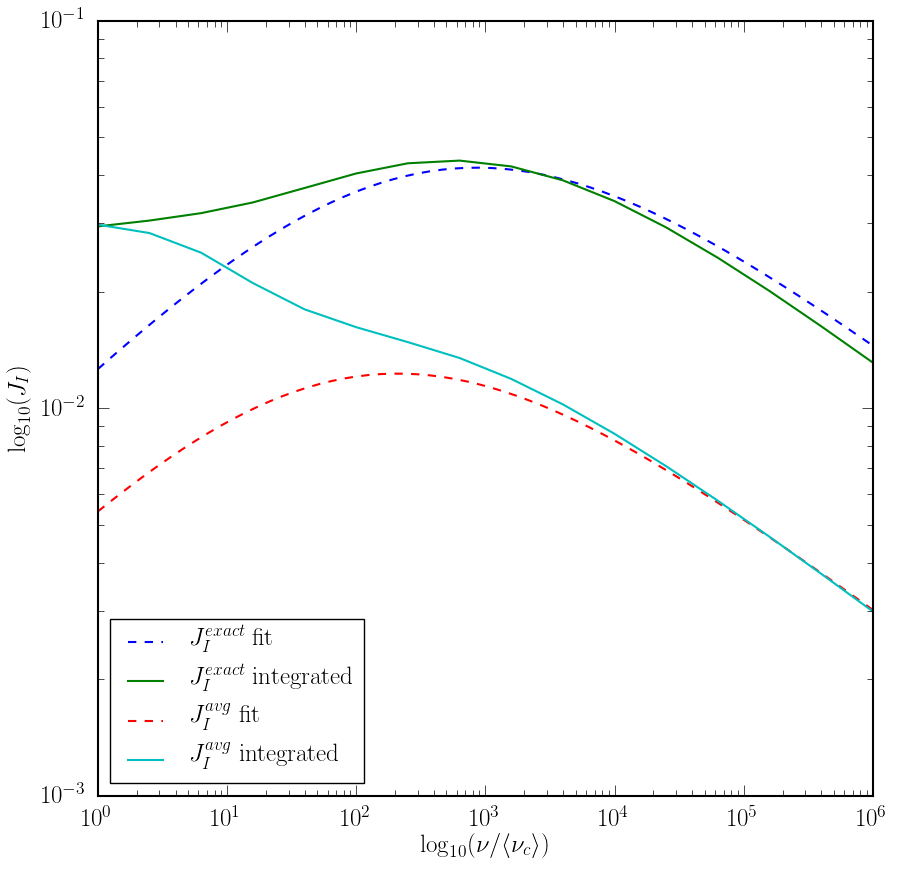

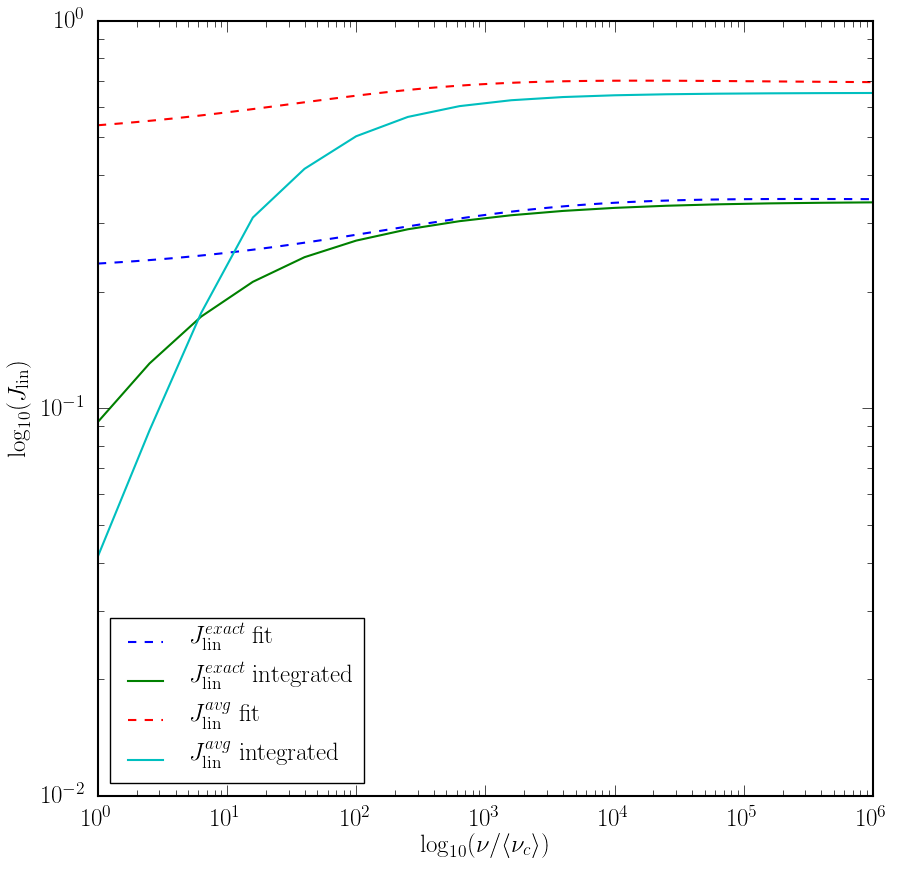

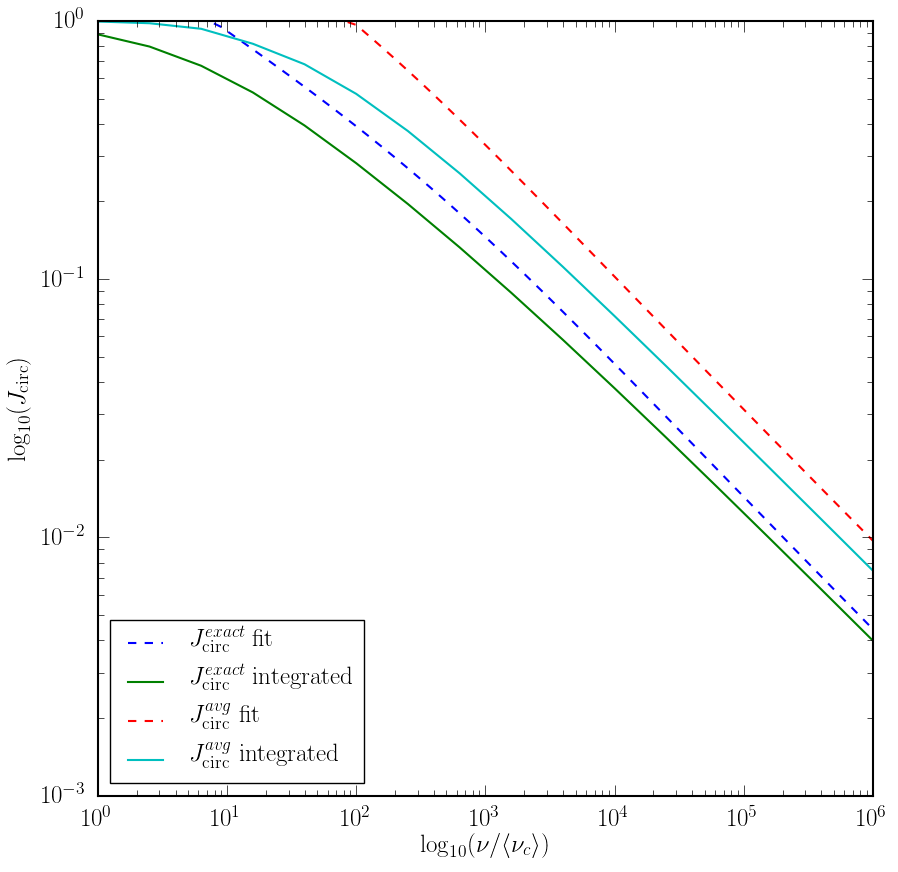

2.0 2.0


In [5]:
#IMPORT INTEGRATED FILES
folder = 'integrated/kappa_jnu/'
dist_emiss = '2_jnu'
nu_used_int        = np.loadtxt(folder + dist_emiss + 'nu.txt')
obs_angle_used_int = np.loadtxt(folder + dist_emiss + 'theta.txt')

exact_avg_only_I_int    = np.loadtxt(folder + dist_emiss + 'exactI.txt')
avgs_only_I_int         = np.loadtxt(folder + dist_emiss + 'avgsI.txt')
exact_avg_only_lin_int  = np.loadtxt(folder + dist_emiss + 'exactlin.txt')
avgs_only_lin_int       = np.loadtxt(folder + dist_emiss + 'avgslin.txt')
exact_avg_only_circ_int = np.loadtxt(folder + dist_emiss + 'exactV.txt')
avgs_only_circ_int      = np.loadtxt(folder + dist_emiss + 'avgsV.txt')




#FIRST INDEX CHOOSES OBSERVER ANGLE
#SECOND INDEX CHOOSES NU

#The theta array is, in deg: [2, 30, 60 ,87]
#3:63, 2:43, 1:21, 0:0

theta_index_int = 0
theta_index_fit = 0

pl.loglog(nu_used, exact_avg_only_I[theta_index_fit, :], label='$J_I^{exact}\\mathrm{~fit}$', ls='dashed')
pl.loglog(nu_used_int, exact_avg_only_I_int[theta_index_int, :], label='$J_I^{exact}\\mathrm{~integrated}$')
pl.loglog(nu_used, avgs_only_I[theta_index_fit, :], label='$J_I^{avg}\\mathrm{~fit}$', ls='dashed')
pl.loglog(nu_used_int, avgs_only_I_int[theta_index_int, :], label='$J_I^{avg}\\mathrm{~integrated}$')
#pl.title('$\\theta = ~$' + str(obs_angle_used_int[theta_index_int]))
pl.xlabel('$\\log_{10}(\\nu/\\langle \\nu_c \\rangle)$')
pl.ylabel('$\\log_{10}(J_I)$')
pl.legend(loc='lower left')
pl.show()

pl.loglog(nu_used, exact_avg_only_lin[theta_index_fit, :], label='$J_{\\mathrm{lin}}^{exact}\\mathrm{~fit}$', ls='dashed')
pl.loglog(nu_used_int, exact_avg_only_lin_int[theta_index_int, :], label='$J_{\\mathrm{lin}}^{exact}\\mathrm{~integrated}$')
pl.loglog(nu_used, avgs_only_lin[theta_index_fit, :], label='$J_{\\mathrm{lin}}^{avg}\\mathrm{~fit}$', ls='dashed')
pl.loglog(nu_used_int, avgs_only_lin_int[theta_index_int, :], label='$J_{\\mathrm{lin}}^{avg}\\mathrm{~integrated}$')
#pl.title('$\\theta = ~$' + str(obs_angle_used_int[theta_index_int]))
pl.xlabel('$\\log_{10}(\\nu/\\langle \\nu_c \\rangle)$')
pl.ylabel('$\\log_{10}(J_{\\mathrm{lin}})$')
pl.legend(loc='lower left')
pl.show()

pl.loglog(nu_used, exact_avg_only_circ[theta_index_fit, :], label='$J_{\\mathrm{circ}}^{exact}\\mathrm{~fit}$', ls='dashed')
pl.loglog(nu_used_int, exact_avg_only_circ_int[theta_index_int, :], label='$J_{\\mathrm{circ}}^{exact}\\mathrm{~integrated}$')
pl.loglog(nu_used, avgs_only_circ[theta_index_fit, :], label='$J_{\\mathrm{circ}}^{avg}\\mathrm{~fit}$', ls='dashed')
pl.loglog(nu_used_int, avgs_only_circ_int[theta_index_int, :], label='$J_{\\mathrm{circ}}^{avg}\\mathrm{~integrated}$')
#pl.title('$\\theta = ~$' + str(obs_angle_used_int[theta_index_int]))
pl.xlabel('$\\log_{10}(\\nu/\\langle \\nu_c \\rangle)$')
pl.ylabel('$\\log_{10}(J_{\\mathrm{circ}})$')
pl.legend(loc='lower left')
pl.show()

print obs_angle_used[theta_index_fit], obs_angle_used_int[theta_index_int]